# __CAS KAGGLE: Website Classification__

#### __Models de classificació__

###### Marina Vázquez Guerrero

###### NIU: 1563735

In [1]:
# impotem les llibreries i els paquets que necessitem
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm, tree, datasets, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### __Neteja de la base de dades__

In [2]:
# llegim la base de dades

data = pd.read_csv("website_classification.csv")


### Neteja de la base de dades

data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.drop(["website_url"], axis=1, inplace=True)

le = LabelEncoder()
data["target_category"] = le.fit(data["Category"]).transform(data["Category"])

data["cleaned_website_text"] = data["cleaned_website_text"].astype(str)
cv = CountVectorizer(analyzer = "word", stop_words = "english")
cv.fit(data["cleaned_website_text"])

dic_category = {'Adult' : 0, 'Business/Corporate' : 1, 'Computers and Technology' : 2, 'E-Commerce' : 3 , 'Education' : 4, 'Food' : 5, 'Forums' : 6, 'Games' : 7,
      'Health and Fitness' : 8, 'Law and Government' : 9, 'News' : 10, 'Photography' : 11, 'Social Networking and Messaging' : 12, 'Sports' : 13, 'Streaming Services' :15}

data.drop(["Category"], axis=1, inplace=True)

### __Models utilitzats en la classificació__

In [3]:
# Fem una divisió del data per a tenir una part del train i una altra del test
X_train,X_test,y_train,y_test = train_test_split(data["cleaned_website_text"], data["target_category"], train_size = 0.6)

In [4]:
# Convert a collection of text documents to a matrix of token counts
x_train_cv = cv.transform(X_train)
x_test_cv = cv.transform(X_test)

x_cv = cv.transform(data["cleaned_website_text"])

In [5]:
# funcio del fit del regressor logistic
def fit_lr(x_t, x_v, y_t, y_v):
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    probs = logireg.predict_proba(x_v)
    predictions = logireg.predict(x_v)
    return accuracy_score(y_v,predictions), probs, y_v

# funcio del fit del svm
def fit_svm(x_t, x_v, y_t, y_v, k = 'linear', C = 10.0, g = 0.9):
    svc = svm.SVC(C=C, kernel=k, gamma=g, probability=True) # creem el regresor svm    
    svc.fit(x_t, y_t) 
    probs = svc.predict_proba(x_v)
    predictions = svc.predict(x_v)
    return accuracy_score(y_v,predictions), probs, y_v

# funcio del decision tree
def decision_tree_fit(x_t, x_v, y_t, y_v):
    dt = tree.DecisionTreeClassifier()
    dt.fit(x_t, y_t)
    probs = dt.predict_proba(x_v)
    predictions=dt.predict(x_v)
    return accuracy_score(y_v, predictions), probs, y_v

# funcio del KNN
def fit_KNN(x_t, x_v, y_t, y_v, n =7):    
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_t,y_t)
    probs = knn.predict_proba(x_v)
    predictions=knn.predict(x_v)
    return accuracy_score(y_v, predictions), probs, y_v

In [6]:
# funcio del random forest
def fit_rf(x_t, x_v, y_t, y_v, i = 10):    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_t,y_t)
    probs = clf.predict_proba(x_v)
    predictions = clf.predict(x_v)
    return accuracy_score(y_v, predictions), probs, y_v

In [7]:
# funcio del KMeans
def fit_KMeans(x_t, x_v, y_t, y_v, n = 16):    
    kmeans = KMeans(n_clusters= n)
    kmeans.fit(x_t,y_t)
    predictions=kmeans.predict(x_v)
    return completeness_score(y_v, predictions)

__Regressió Logística__

In [8]:
i = time.time()
acc_lr, probs_lr, y_v = fit_lr(x_train_cv, x_test_cv, y_train, y_test)
f = time.time()
print("acc", acc_lr,"temps: ", f-i)

acc 0.8386524822695035 temps:  35.09802794456482


__SVM__

In [9]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
acc_dict = {}

for k in kernels:
    acc_svm, *_= fit_svm(x_train_cv, x_test_cv, y_train, y_test,k)
    acc_dict[k] = acc_svm
    
acc_dict

{'linear': 0.7641843971631206,
 'poly': 0.4645390070921986,
 'rbf': 0.1099290780141844,
 'sigmoid': 0.11879432624113476}

In [10]:
# veiem que el millor kernel és el lineal
i = time.time()
acc_svm, probs_svm, y_v = fit_svm(x_train_cv, x_test_cv, y_train, y_test,"linear")
f = time.time()
print("acc", acc_svm,"temps: ", f-i)

acc 0.7641843971631206 temps:  9.545153379440308


__Decision Tree__

In [11]:
i = time.time()
acc_dt, probs_dt, y_v = decision_tree_fit(x_train_cv, x_test_cv, y_train, y_test)
f = time.time()
print("acc", acc_dt,"temps: ", f-i)

acc 0.6560283687943262 temps:  0.9027225971221924


__KNN__

Millor precisió: 0.5673758865248227 amb k = 1


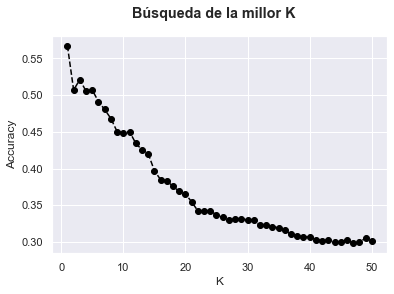

In [12]:
#Per a poder trobar d'una manera fàcil quina podria ser la millor k, anem fent proves 

acc_lst = []
for k in range(1,51):
    acc_knn, *_ = fit_KNN(x_train_cv, x_test_cv, y_train, y_test, k)
    acc_lst.append(acc_knn)

plt.figure()
plt.suptitle("Búsqueda de la millor K", fontsize = 'x-large', fontweight = 'bold')
plt.plot(range(1,51), acc_lst, 'o--', color='black')
plt.xlabel('K')
plt.ylabel('Accuracy')

k_millor = acc_lst.index(max(acc_lst))
print("Millor precisió:", acc_lst[k_millor], "amb k =", k_millor+1)

In [13]:
# veiem que la millor k és 1
i = time.time()
acc_knn, probs_knn, y_v = fit_KNN(x_train_cv, x_test_cv, y_train, y_test, 1)
f = time.time()
print("acc", acc_knn,"temps: ", f-i)

acc 0.5673758865248227 temps:  0.1879739761352539


__Baggin__

In [14]:
# bagging regressió lineal

i = time.time()
clf = BaggingClassifier(base_estimator=LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001), n_estimators=10, random_state=0).fit(x_train_cv, y_train)
f = time.time()

print("acc", clf.score(x_test_cv, y_test),"temps: ", f-i)

acc 0.8173758865248227 temps:  398.9837532043457


In [15]:
# bagging knn

i = time.time()
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7), n_estimators=10, random_state=0).fit(x_train_cv, y_train)
f = time.time()

print("acc", clf.score(x_test_cv, y_test),"temps: ", f-i)

acc 0.4804964539007092 temps:  0.13466763496398926


In [16]:
# bagging svc lineal

i = time.time()
clf = BaggingClassifier(base_estimator=svm.SVC(C=10.0, kernel="linear", gamma=0.9, probability=True), n_estimators=10, random_state=0).fit(x_train_cv, y_train)
f = time.time()

print("acc", clf.score(x_test_cv, y_test),"temps: ", f-i)

acc 0.7712765957446809 temps:  50.64908266067505


In [7]:
# Random Forest 

acc_lst = []
for t in range(1,300):
    acc_rf, *_ = fit_rf(x_train_cv, x_test_cv, y_train, y_test, t)
    acc_lst.append(acc_rf)


Millor precisió: 0.8439716312056738 amb t = 220


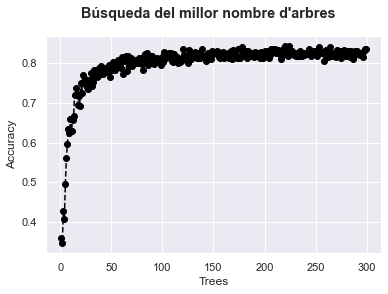

In [8]:
plt.figure()
plt.suptitle("Búsqueda del millor nombre d'arbres", fontsize = 'x-large', fontweight = 'bold')
plt.plot(range(1,300), acc_lst, 'o--', color='black')
plt.xlabel('Trees')
plt.ylabel('Accuracy')

t_millor = acc_lst.index(max(acc_lst))
print("Millor precisió:", acc_lst[t_millor], "amb t =", t_millor+1)

In [10]:
# veiem que la millor t és 220
i = time.time()
acc_rf, probs_knn, y_v = fit_rf(x_train_cv, x_test_cv, y_train, y_test, t_millor)
f = time.time()
print("acc", acc_rf,"temps: ", f-i)

acc 0.824468085106383 temps:  4.002259254455566


__Boosting__

In [21]:
# boosting adaptive (adaboost) 500

i = time.time()
clf = AdaBoostClassifier(n_estimators=500).fit(x_train_cv, y_train)
scores = cross_val_score(clf, x_cv, data["target_category"], cv=5)
f = time.time()

print("acc", scores.mean(),"temps: ", f-i)

acc 0.21506019535095025 temps:  435.6606721878052


__Kmeans__

Millor precisió: 0.4286189429688102 amb k = 25


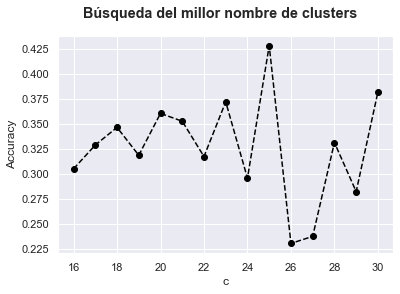

In [22]:
#Per a poder trobar d'una manera fàcil quina podria ser la millor k, anem fent proves 

acc_lst = []
for c in range(16,31):
    acc_kmeans = fit_KMeans(x_train_cv, x_test_cv, y_train, y_test,c)
    acc_lst.append(acc_kmeans)

plt.figure()
plt.suptitle("Búsqueda del millor nombre de clusters", fontsize = 'x-large', fontweight = 'bold')
plt.plot(range(16,31), acc_lst, 'o--', color='black')
plt.xlabel('c')
plt.ylabel('Accuracy')

k_millor = acc_lst.index(max(acc_lst))
print("Millor precisió:", acc_lst[k_millor], "amb k =", k_millor+16)

In [23]:
# veiem que el millor nombre de clúster és 29 sobre 31
i = time.time()
acc_kmeans = fit_KMeans(x_train_cv, x_test_cv, y_train, y_test,29)
f = time.time()
print("acc", acc_kmeans,"temps: ", f-i)

acc 0.21399144008695145 temps:  8.767739534378052


### __Búsqueda d'Hiperparàmetres  i Cross Validation dels millors models__

__Regressió Logística__

In [8]:
# Busquem els hiperparàmetres per a un kernel lineal del model SVM

cs = np.logspace(2, 5, 40) #posibles valores para C
tuned_parameters = [{"C": cs}]

clf = GridSearchCV(LogisticRegression(tol=0.001), tuned_parameters, scoring="%s_macro" % 'precision')
clf.fit(x_train_cv, y_train)

print("Millor paràmetre trobat:", clf.best_params_, "\n")

means = clf.cv_results_["mean_test_score"]
best = clf.best_params_

Millor paràmetre trobat: {'C': 20309.17620904739} 



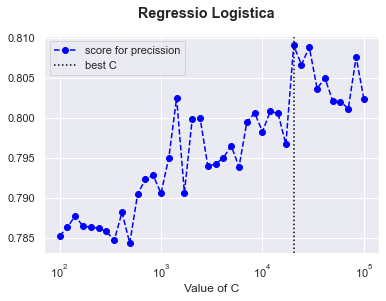

In [9]:
# graph to visualize the hyperparameter search 

fig = plt.figure()

plt.suptitle("Regressio Logistica", fontsize = 'x-large', fontweight = 'bold')
plt.plot(cs, means, "o--", label="score for precission", color="blue")
plt.xscale("log")
plt.axis('tight')
plt.xlabel('Value of C')
plt.axvline(x=best['C'], color='black', label='best C', ls = ":")

plt.legend()
plt.show()

In [ ]:
# Amb la Regressió Logística
clf = LogisticRegression(C=2, fit_intercept=True, penalty='l2', tol=0.001) 
scores_lr = cross_val_score(clrf, x_cv, data["target_category"], cv=10)
scores_lr

__SVM__

In [24]:
# Busquem els hiperparàmetres per a un kernel lineal del model SVM

cs = np.logspace(-6, 1, 40) #posibles valores para C
tuned_parameters = [{"C": cs}]

clf = GridSearchCV(svm.SVC(kernel = 'linear'), tuned_parameters, scoring="%s_macro" % 'precision')
clf.fit(x_train_cv, y_train)

print("Millor paràmetre trobat:", clf.best_params_, "\n")

means = clf.cv_results_["mean_test_score"]
best = clf.best_params_

Millor paràmetre trobat: {'C': 0.00014251026703029977} 



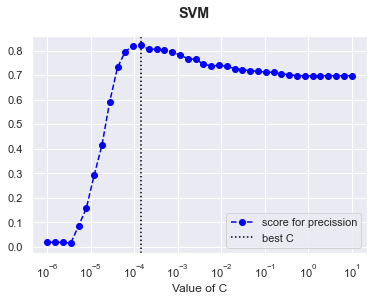

In [25]:
# graph to visualize the hyperparameter search 

fig = plt.figure()

plt.suptitle("SVM", fontsize = 'x-large', fontweight = 'bold')
plt.plot(cs, means, "o--", label="score for precission", color="blue")
plt.xscale("log")
plt.axis('tight')
plt.xlabel('Value of C')
plt.axvline(x=best['C'], color='black', label='best C', ls = ":")

plt.legend()
plt.show()

In [27]:
# Amb el SVM
clf = svm.SVC(C=0.00014251026703029977, kernel='linear', gamma=0.9, probability=True)
scores_svm = cross_val_score(clf, x_cv, data["target_category"], cv=15)
scores_svm

array([0.64893617, 0.59574468, 0.58510638, 0.60638298, 0.61702128,
       0.60638298, 0.63829787, 0.60638298, 0.58510638, 0.60638298,
       0.61702128, 0.61702128, 0.57446809, 0.55913978, 0.49462366])